# EXAMEN INTERCICLO SIMULACIÓN

### VÁSQUEZ FAJARDO FRANKLIN JOEL

In [1]:
import pandas as pd
import numpy as np
import altair as alt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import linear_model
print('Librerias Importadas')

Librerias Importadas


In [2]:
#Lectura dataset.
df = pd.read_csv('./examen.csv')
df.head(10)

username                                            comment reply  \
0  Presidencia ECU  El presidente \n@LassoGuillermo\n, durante su ...   166   
1  Guillermo Lasso  Hoy tuve la oportunidad de dialogar con \n@leo...   581   
2  Guillermo Lasso  Fue un honor recibir a representantes de \n@US...   207   
3  Guillermo Lasso  Esta noche mantuvimos la primera reunión del C...   368   
4  Guillermo Lasso  El Decreto que elimina los registros de crédit...   256   
5  Guillermo Lasso  El #GobiernoDelEncuentro, a su servicio. \n\n#...   375   
6  Guillermo Lasso  Empieza el cambio, bienvenidos al Ecuador del ...  1.1K   
7  Guillermo Lasso  “Este 24 de mayo de 2021, empezamos a construi...   125   
8  Guillermo Lasso  En el Gobierno del encuentro, \n@MarceloHCabre...   234   
9  Guillermo Lasso  El Secretario General de Comunicación será \n@...   160   

  retweet   like  
0     556   4.5K  
1     874   4.2K  
2     638   2.8K  
3    1.1K   5.8K  
4     875   3.5K  
5    1.3K   8.8K  
6    5.7K  26.3K  
7     620   3.6K  
8     337   1.9K  
9     281   1.5K

## Limpieza y Obtención de datos netamente necesarios.

A continuacion realizaremos la limpieza  de nuestros datos , esto ya que se verifico que los datos vienen con simbologia y no convertidos en numeros, en este caso vamos a transformar a numeros las columnas que usaremos durante nuestro proceso.

In [3]:
df.like = (df.like.replace(r'[KM]+$', '', regex=True).astype(float) * \
              df.like.str.extract(r'[\d\.]+([KM]+)', expand=False)
                .fillna(1)
                .replace(['K','M'], [10**3, 10**6]).astype(int))

df.retweet = (df.retweet.replace(r'[KM]+$', '', regex=True).astype(float) * \
             df.retweet.str.extract(r'[\d\.]+([KM]+)', expand=False)
                .fillna(1)
                .replace(['K','M'], [10**3, 10**6]).astype(int))

df.head(10)

username                                            comment reply  \
0  Presidencia ECU  El presidente \n@LassoGuillermo\n, durante su ...   166   
1  Guillermo Lasso  Hoy tuve la oportunidad de dialogar con \n@leo...   581   
2  Guillermo Lasso  Fue un honor recibir a representantes de \n@US...   207   
3  Guillermo Lasso  Esta noche mantuvimos la primera reunión del C...   368   
4  Guillermo Lasso  El Decreto que elimina los registros de crédit...   256   
5  Guillermo Lasso  El #GobiernoDelEncuentro, a su servicio. \n\n#...   375   
6  Guillermo Lasso  Empieza el cambio, bienvenidos al Ecuador del ...  1.1K   
7  Guillermo Lasso  “Este 24 de mayo de 2021, empezamos a construi...   125   
8  Guillermo Lasso  En el Gobierno del encuentro, \n@MarceloHCabre...   234   
9  Guillermo Lasso  El Secretario General de Comunicación será \n@...   160   

   retweet     like  
0    556.0   4500.0  
1    874.0   4200.0  
2    638.0   2800.0  
3   1100.0   5800.0  
4    875.0   3500.0  
5   1300.0   8800.0  
6   5700.0  26300.0  
7    620.0   3600.0  
8    337.0   1900.0  
9    281.0   1500.0

## Conteo de datos  

Procederemos a realizar un conteo de todos nuestros datos , en este caso usaremos como referencia la longitud del tweet , 
las etiquetas y las referenciass que se han realizado, luego de esto añadiremos dichas columnas a nuestro 
dataframe para trabajar con dichos datos.

In [4]:
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val > 0 else 'black'
    return 'color: %s' % color

In [5]:
df['etiquetas'] = df.comment.apply(lambda x: str(x).count('#'))
df['longitd'] = df.comment.apply(lambda x: len(str(x)))
df['referencias'] = df.comment.apply(lambda x: str(x).count('@'))  
df.head(10)

username                                            comment reply  \
0  Presidencia ECU  El presidente \n@LassoGuillermo\n, durante su ...   166   
1  Guillermo Lasso  Hoy tuve la oportunidad de dialogar con \n@leo...   581   
2  Guillermo Lasso  Fue un honor recibir a representantes de \n@US...   207   
3  Guillermo Lasso  Esta noche mantuvimos la primera reunión del C...   368   
4  Guillermo Lasso  El Decreto que elimina los registros de crédit...   256   
5  Guillermo Lasso  El #GobiernoDelEncuentro, a su servicio. \n\n#...   375   
6  Guillermo Lasso  Empieza el cambio, bienvenidos al Ecuador del ...  1.1K   
7  Guillermo Lasso  “Este 24 de mayo de 2021, empezamos a construi...   125   
8  Guillermo Lasso  En el Gobierno del encuentro, \n@MarceloHCabre...   234   
9  Guillermo Lasso  El Secretario General de Comunicación será \n@...   160   

   retweet     like  etiquetas  longitd  referencias  
0    556.0   4500.0          1      233            1  
1    874.0   4200.0          2      272            2  
2    638.0   2800.0          2      282            2  
3   1100.0   5800.0          1      277            0  
4    875.0   3500.0          2      266            0  
5   1300.0   8800.0          2       60            0  
6   5700.0  26300.0          2      118            0  
7    620.0   3600.0          1      278            1  
8    337.0   1900.0          0      267            1  
9    281.0   1500.0          0      270            1

## Modelo de Regresión Lineal

In [8]:
X = df[['longitd', 'referencias']]
y = df['retweet']

In [9]:
lineal = linear_model.LinearRegression()
lineal.fit(X, y)

LinearRegression()

In [10]:
lineal.predict([[400,7]])

array([111.02791216])

In [11]:
prediccion = lineal.predict(X)
dataframe = pd.DataFrame(prediccion,columns=['PREDICCION'])
dataframe.head(5)

PREDICCION
0  487.341070
1  408.580554
2  394.214892
3  446.866588
4  462.668817

In [12]:
##Grafica Predicción

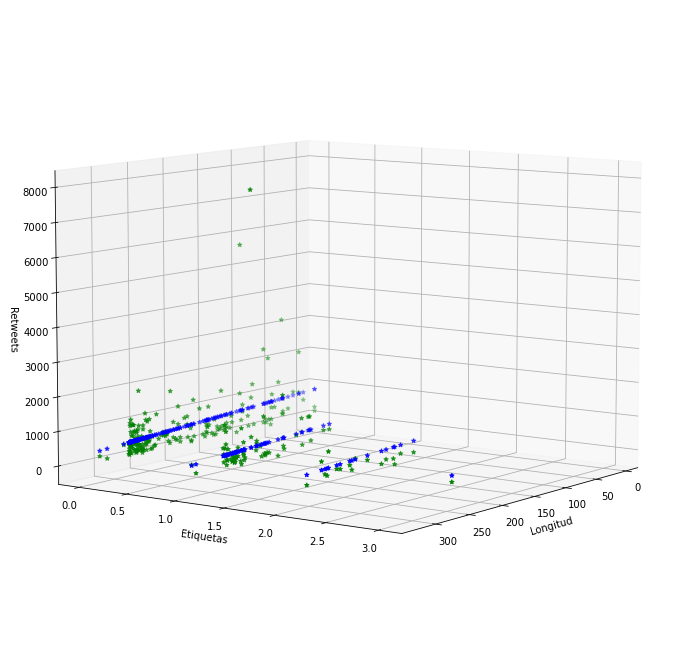

In [13]:
grafica = plt.figure(figsize=(9,9))
graf = Axes3D(grafica)
graf.scatter(list(X.longitd), list(X.referencias), prediccion, c='b', marker='*')
graf.scatter(list(X.longitd), list(X.referencias), y, c='g', marker='*')
graf.view_init(elev=8., azim=36)
graf.set_zlabel('Retweets')
graf.set_ylabel('Etiquetas')
graf.set_xlabel('Longitud')
plt.show()